# Übung 2: Morphologische Operationen
##### Student: Adrian Kauz  
***

### Einführung

In dieser Übung wollen wir morphologische Operationen in OpenCV betrachten.


### Imports

In [29]:
# OpenCV needs to be included first
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Matplot-Params

In [30]:
%matplotlib inline
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi']= 100

### Aufgabe 1: Dilate and Erode

Morphologische Operationen werden typischerweise auf binären Bildern angewendet. (Die OpenGL Implementationen verwenden jeweils die Maximum Operationen zwischen Strukturelement und Bild, sodass die Operationen zumindest auch auf Grauwert Bildern durchgeführt werden können, ausserdem werden die Operationen auf allen Kanälen angewendet.)

Ein Beispiel Bild steht unter images/Figuren.png zur Verfügung. Typischerweise erhalten sie ein binäres Bild sonst mit einer Schwellwert (Threshold) Operation.

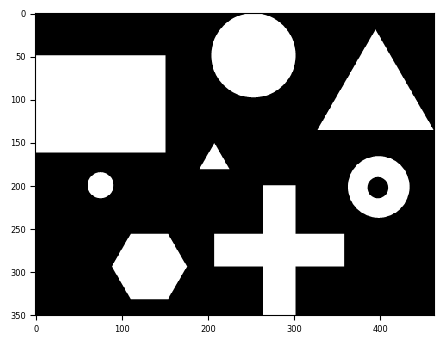

In [31]:
image = cv2.imread('images/figuren.png')
plt.imshow(image)


Wenden Sie die morphologischen Operationen dilate und erode mit verschiedenen Strukturelementen und verschiedenen Grössen an. Strukturelemente können mit der Funktion `getStructuringElement` erzeugt werden. Die OpenGL Implementation erlaube es auch die Operationen mit einem Aufruf mehrmals anzuwenden.

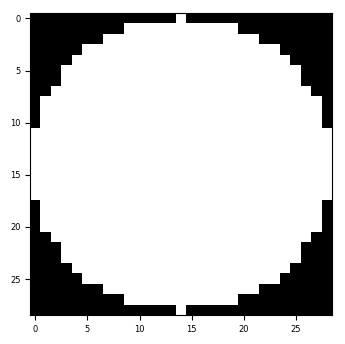

In [32]:
structNumber = 1
structWidth = 29
structHeight = 29
erosionType = None

if(structNumber == 0): erosionType = cv2.MORPH_RECT
elif(structNumber == 1): erosionType = cv2.MORPH_ELLIPSE
elif(structNumber == 2): erosionType = cv2.MORPH_CROSS
    
struct = cv2.getStructuringElement(erosionType, (structWidth, structHeight))
plt.imshow(struct, cmap='gray')

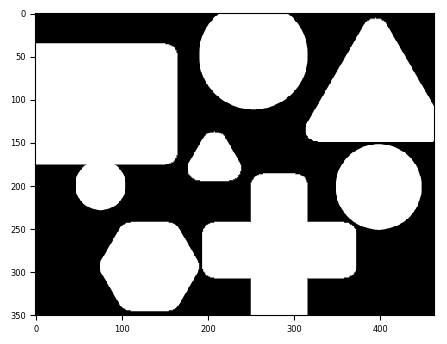

In [33]:
image_dilate = cv2.dilate(image, struct, iterations = 1)
plt.imshow(image_dilate)

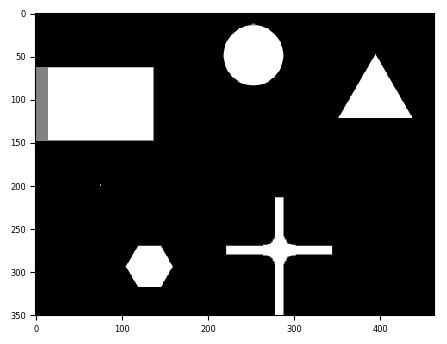

In [34]:
image_erode = cv2.erode(image, struct, iterations = 1)
plt.imshow(image_erode)

### Aufgabe 2: Opening/Closing


Für Opening und Closing kann in OpenCV die Funktion `morphologyEx` verwendet werden. Wie wirkt sich opening and closing auf das Beispielbild aus?

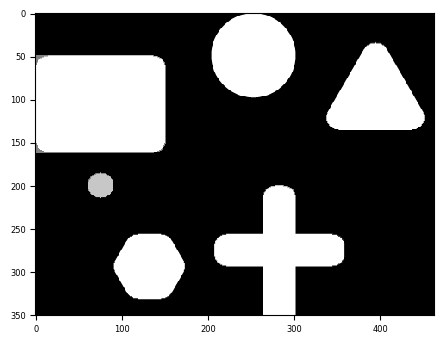

In [35]:
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct)
plt.imshow(image_open)  

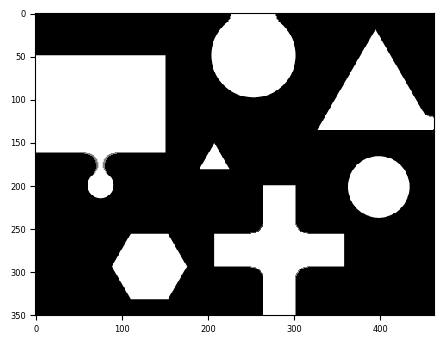

In [36]:
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct)
plt.imshow(image_close)  

### Aufgabe 3: Kugeln zählen

Finden Sie eine Sequenz von OpenCV Operationen die die Kugeln in folgenden Bild zählt? Als Ausgabe sollten sie dann also schlussendlich eine Zahl (zu Speichern in `nr_kugeln`) erhalten.

Hinweis: Beachten Sie dass die Kugeln schwarz auf hellem Hintergrund dargestellt sind.


Anzahl Kugeln: 77


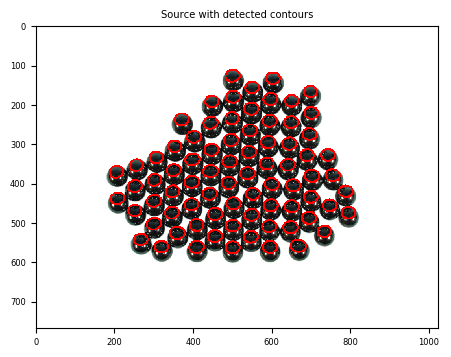

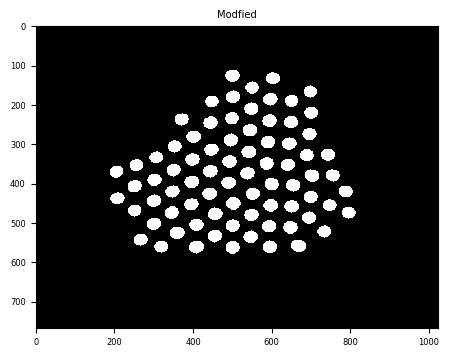

In [37]:
nr_kugeln = 0
kugeln = cv2.imread('images/kugeln.jpg')

# Load image as grayscale
kugeln_gray = cv2.cvtColor(kugeln, cv2.COLOR_BGR2GRAY)

# Invert it
kugeln_gray = cv2.bitwise_not(kugeln_gray)

# Use Erode
kugeln_gray = cv2.morphologyEx(kugeln_gray, cv2.MORPH_OPEN, struct)

# Define what range should be white or black
kugeln_gray[kugeln_gray > 30] = 255
kugeln_gray[kugeln_gray < 30] = 0

# Count Contours
_, contours, _ = cv2.findContours(kugeln_gray.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Draw found contours
for cnt in contours:
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(kugeln, ellipse, (255,0,0), 4)

# Print result
print('Anzahl Kugeln: {}'.format(len(contours)))
plt.figure()
plt.title('Source with detected contours')
plt.imshow(kugeln)
plt.figure()
plt.title('Modfied')
plt.imshow(kugeln_gray, cmap='gray')